### 【[周末影音](https://www.facebook.com/watch?v=1355792181717569)解盤】短線盤整，籌碼觀望  
外資休假台股低量，還有哪些類股維持多方？  
未來國際股市進入盤整，但有一個國家是金融市場寄予厚望，未來解盤觀察要新增哪一個國家呢？  
年度的線上課程早鳥預購，將常見的問題做彙整，有興趣的同學可以參考。  
完整內容請參考影音解盤~  
https://www.facebook.com/kevinyang20180801/videos/1355792181717569  

本周整理個股時，發現選股難度已經到非常高，除原本觀察股之外，不大能找到可以新增的個股，不過大家如果看完影片，就會知道這是很正常的現象。所以既然外資都放假了，大家投資了一年，不妨也跟著外資放個假吧！下周就盡量多看少做，持有個股持續觀察即可，我自己目前手上僅剩一檔，下周可買可不買，輕鬆看盤。  
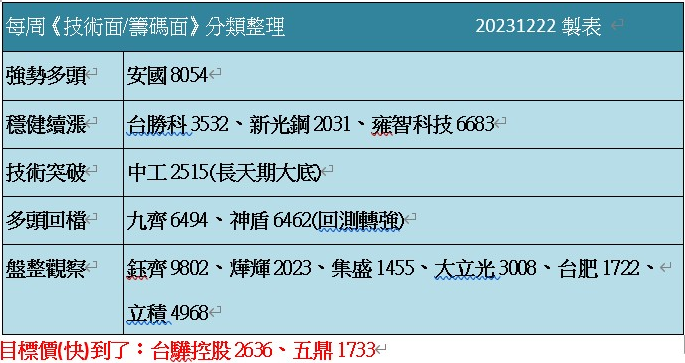  
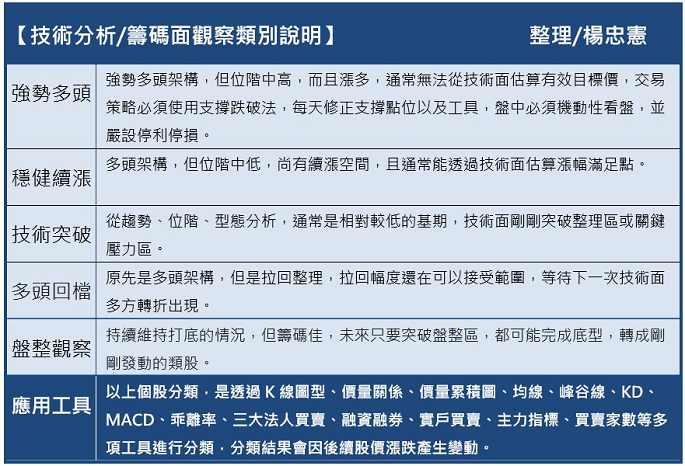  

### 本日進度  
* 2023 iThome 鐵人賽發佈文章未受重視，因此刪除相對應之iThome帳號。並且移除所有「股票投資筆記」內有關參賽的資訊，以及刪除於GitHub上相關儲存庫。  
* 追蹤觀察：亞航(2630)  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

In [2]:
##### 使用2023年6月13日到2023年12月22日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('./data/SINO_2630_231224.xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

In [3]:
import myutils

# 尋找轉折點
_,_,max_min = myutils.FindingTurningPoints(df_k_line,'open_close',order=10)

# 顯示轉折點
display(max_min)

,Date,Price,Type
DateIndex,,,
2,2023-06-15,64.7,HI
47,2023-08-22,31.1,LO
63,2023-09-13,44.0,HI
95,2023-11-01,31.0,LO
113,2023-11-27,39.4,HI


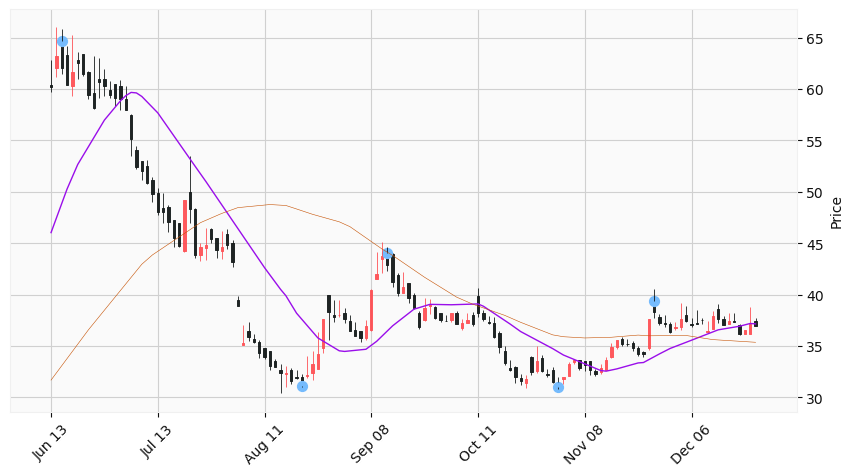

In [4]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定均線與轉折點    
turning_points_len = len(np.array(df_k_line['Close']))
turning_points = np.array([np.nan]*turning_points_len)
for point in max_min.iterrows() :
    turning_points[point[0]] = point[1]['Price']    
apds = [
    mpf.make_addplot(turning_points,type='scatter',marker='o',markersize=50,color='xkcd:sky blue'),
    mpf.make_addplot(df_sma['SMA20'],width=1.0,color='xkcd:violet'),
    mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:dark orange')
]

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=apds)
mpf.plot(df_k_line,**kwargs)

In [5]:
# 設定（預計）頸線 – 型態尚未成立
neckline_start_date = '2023-07-13'
neckline_end_date = df_k_line.iloc[-1].name.strftime("%Y-%m-%d")
neckline_price = df_k_line.loc['2023-09-13']['Open']

# 估算目標價
bottom_price_date = '2023-11-01'
bottom_price = df_k_line.loc[bottom_price_date]['Close']
target_price = (neckline_price - bottom_price) + neckline_price
print('頸線價格 ＝ {:.2f}元 ， 底部最低價格 ＝ {:.2f}元 ； 估算目標價 ＝ {:.2f}元'.format(neckline_price,bottom_price,target_price))

頸線價格 ＝ 44.00元 ， 底部最低價格 ＝ 31.00元 ； 估算目標價 ＝ 57.00元


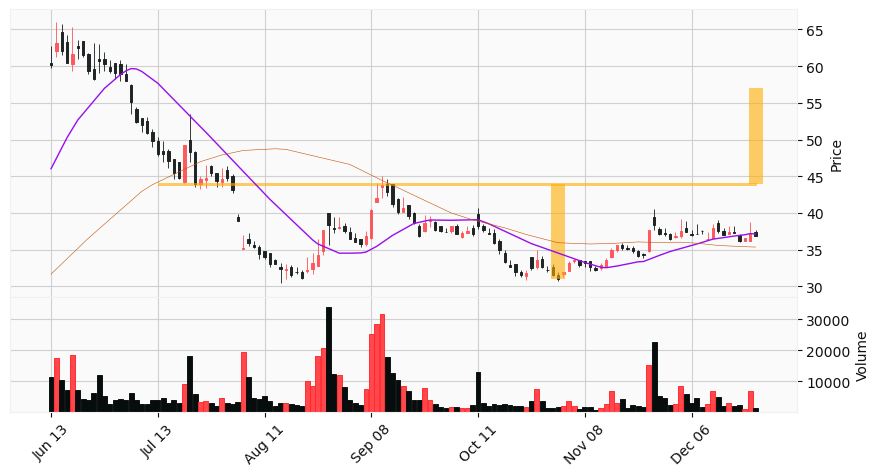

In [6]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定頸線
seq_of_seq_of_points=[
    [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
    [(bottom_price_date,bottom_price),(bottom_price_date,neckline_price)],
    [(neckline_end_date,neckline_price),(neckline_end_date,target_price)]
                     ]

# 設定均線
added_plots={
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=1.0,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:dark orange')
    
            }

# 繪製K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), volume=True,addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=(1.0,10,10), colors='xkcd:orange yellow', alpha=0.6), warn_too_much_data=1000)

mpf.plot(df_k_line,**kwargs)

* 追蹤觀察：台肥(1722)  

In [7]:
##### 使用2022年04月06日到2023年12月22日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('./data/SINO_1722_231224.xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

,Date,Price,Type
DateIndex,,,
3,2022-04-11,82.8,HI
67,2022-07-12,60.0,LO
91,2022-08-15,67.0,HI
137,2022-10-20,50.9,LO
167,2022-12-01,56.8,HI
188,2022-12-30,53.0,LO
289,2023-06-12,62.3,HI
366,2023-10-03,58.6,LO
417,2023-12-15,69.3,HI


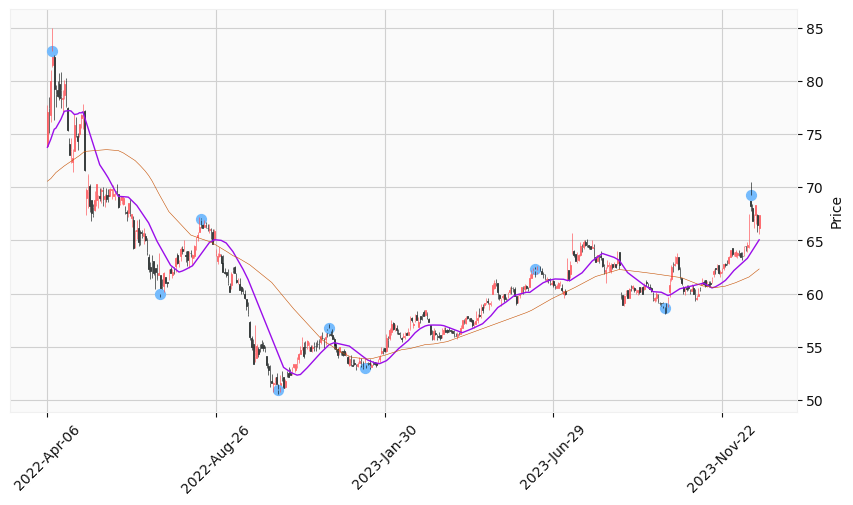

In [8]:
# 尋找轉折點
_,_,max_min = myutils.FindingTurningPoints(df_k_line,'open_close',order=20)

# 顯示轉折點
display(max_min)

# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定均線與轉折點    
turning_points_len = len(np.array(df_k_line['Close']))
turning_points = np.array([np.nan]*turning_points_len)
for point in max_min.iterrows() :
    turning_points[point[0]] = point[1]['Price']    
apds = [
    mpf.make_addplot(turning_points,type='scatter',marker='o',markersize=50,color='xkcd:sky blue'),
    mpf.make_addplot(df_sma['SMA20'],width=1.0,color='xkcd:violet'),
    mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:dark orange')
]

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=apds)
mpf.plot(df_k_line,**kwargs)